From https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

The dataset has some issues converting it into Pandas dataframe as it contains TAB/ spaces in the data.


The dataset 'chronic_kidney_disease.arff' has the following problems.

It contains tabs.
Two tuples have anomalies in them. One of them has extra space and the other one has an extra ','.
To make the arff file to be read through loadarff, do the following

Replace all tabs with nothing. It can be done quickly with any rich text editor with a simple find and replace. I used Notepad++ to do this.
At line 60 in the file, there is an extra space in front of the value 'yes'. This needs to be removed.
At line 399 in the file, there is an extra ','. This needs to be removed as well.
After doing the above corrections the file is loading fine through loadarff.



If you want to read the dataset directly from UCI, I suggest the following:


In [5]:
import pandas as pd

data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=names)

df


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,None
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,None
399,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,...,6800,6.1,no,no,no,good,no,no,notckd,None
400,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


You can also find the .csv data in Kaggle. Here https://www.kaggle.com/datasets/mansoordaku/ckdisease, you can download the kidney_disease.csv, which is the same data.

##### Necessary imports 

In [6]:

# Install pip install plotly if not already installed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 25)


#### Loading CSV data

In [7]:

df= pd.read_csv('chronic_kidney_disease.csv')
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,...,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,...,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


#### Shape of the dataset is (400, 25) which means it has 400 rows and 25 columns

In [8]:
df.shape


(400, 26)

#### Drop useless column which I have noticed 

In [9]:
df.drop('id', axis=1, inplace=True)
df.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


#### Rename column names to make it more user-friendly

In [10]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


#### head() is used to display the first few rows of the DataFrame.

In [11]:
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


#### describe the dataset to get an overview of the data
###### This will give us the count, mean, std, min, max, and quartiles for each numeric column
###### This is useful for understanding the distribution of the data and identifying any potential outliers.

In [12]:
df.describe()


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


#### information about the dataset
###### this will show the data types and non-null counts, useful to understand the structure of the dataset
###### and to identify any missing values
###### this will also show the memory usage of the dataset

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

#### As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. 
##### We need to change them to numerical dtype.
##### We will use pd.to_numeric() to convert these columns to numeric dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

<Axes: >

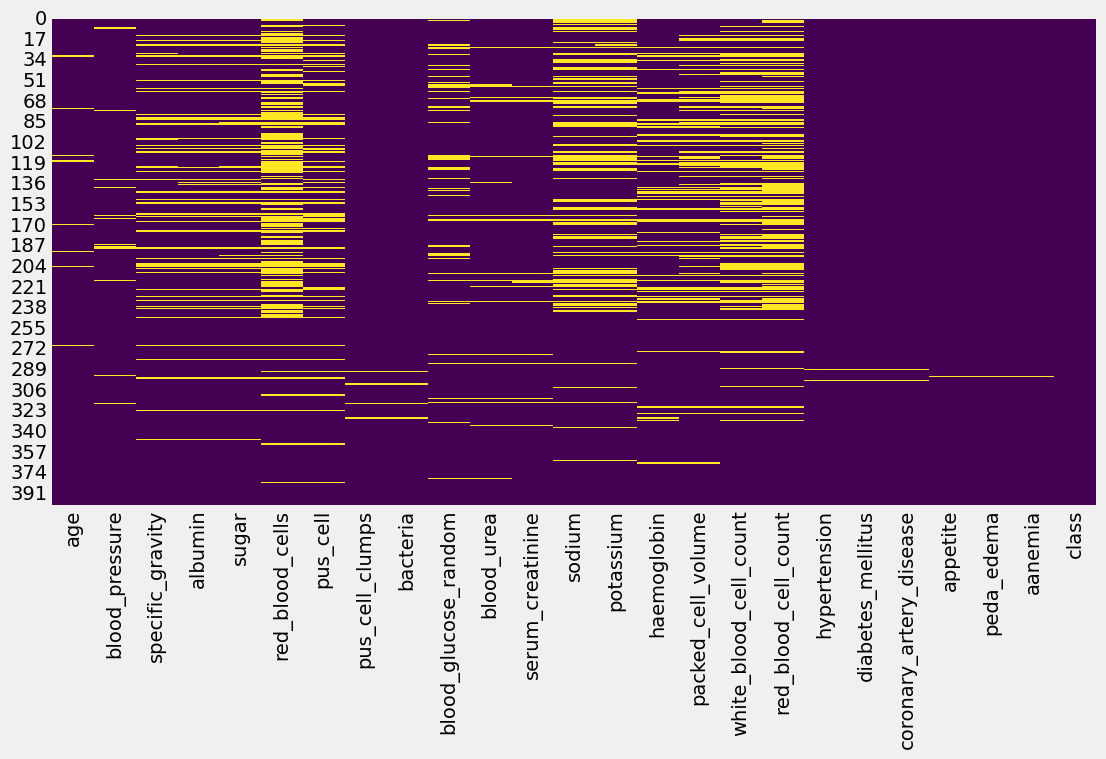

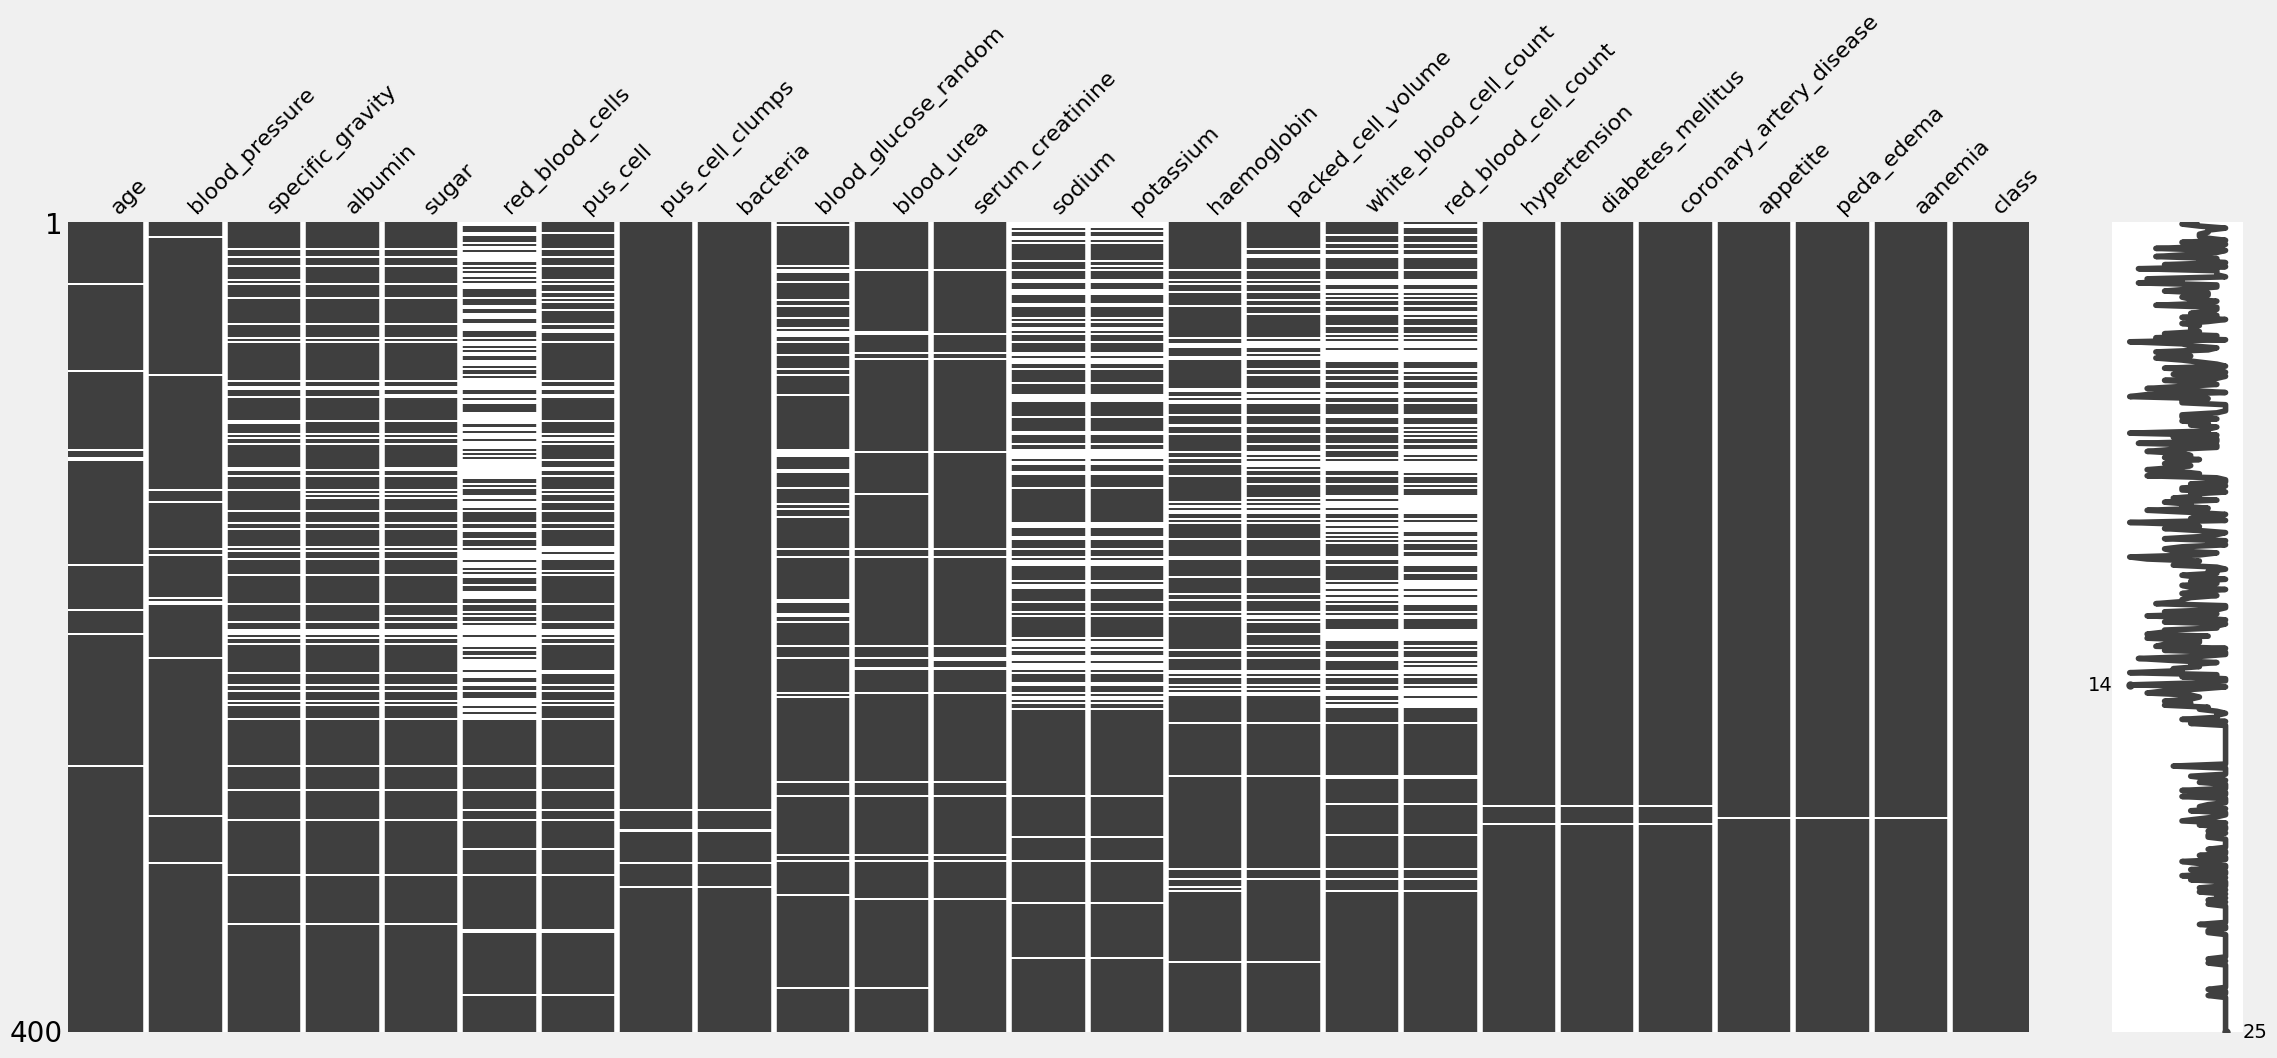

In [14]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df.info()

# Now we can see that the columns are converted to numeric dtype.
# Now we can check for missing values in the dataset
df.isnull().sum()

# We can see that there are some missing values in the dataset.
# We can use the heatmap to visualize the missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# We can see that there are some missing values in the dataset.
# We can also use the missingno library to visualize the missing values in the dataset
import missingno as msno
msno.matrix(df)

# We can see that there are some missing values in the dataset.


#### The graph above shows the missing values in the dataset.
#### We can see that there are some missing values in the dataset.
#### We can also use the bar plot to visualize the missing values in the dataset

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


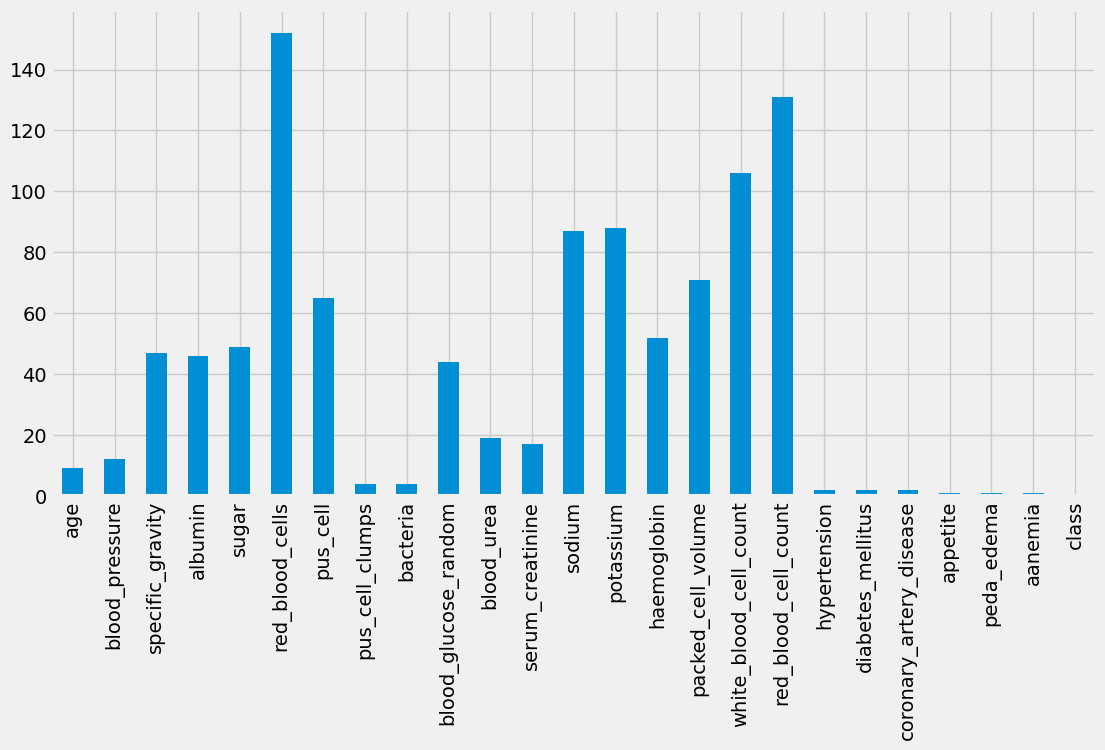

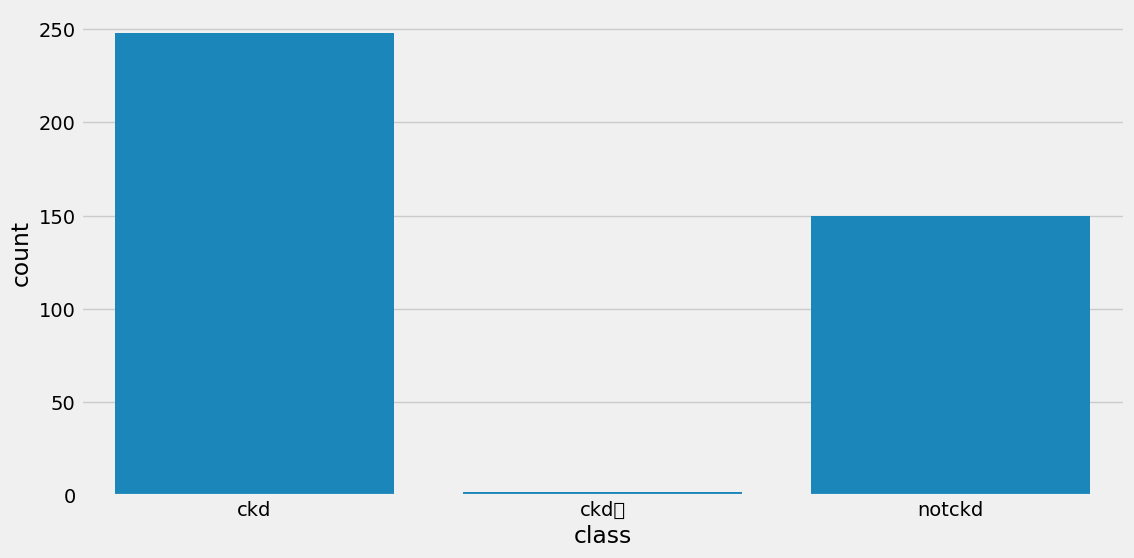

In [15]:
plt.figure(figsize=(12, 6))
df.isnull().sum().plot(kind='bar')

# We can see that there are some missing values in the dataset.
# We can also use the countplot to visualize the missing values in the dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=df)

# We can see that there are some missing values in the dataset.
# We can also use the value_counts() method to visualize the missing values in the dataset
print(df['class'].value_counts())


### Extracting categorical and numerical columns

In [16]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']


#### Looking at unique values in categorical columns

In [17]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")


red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



#### There is some ambugity present in the columns we have to remove that.

### replace incorrect values 

In [18]:
# There is some ambugity present in the columns we have to remove that.

# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})


In [19]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')


In [20]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")


diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



#### Checking numerical features distribution

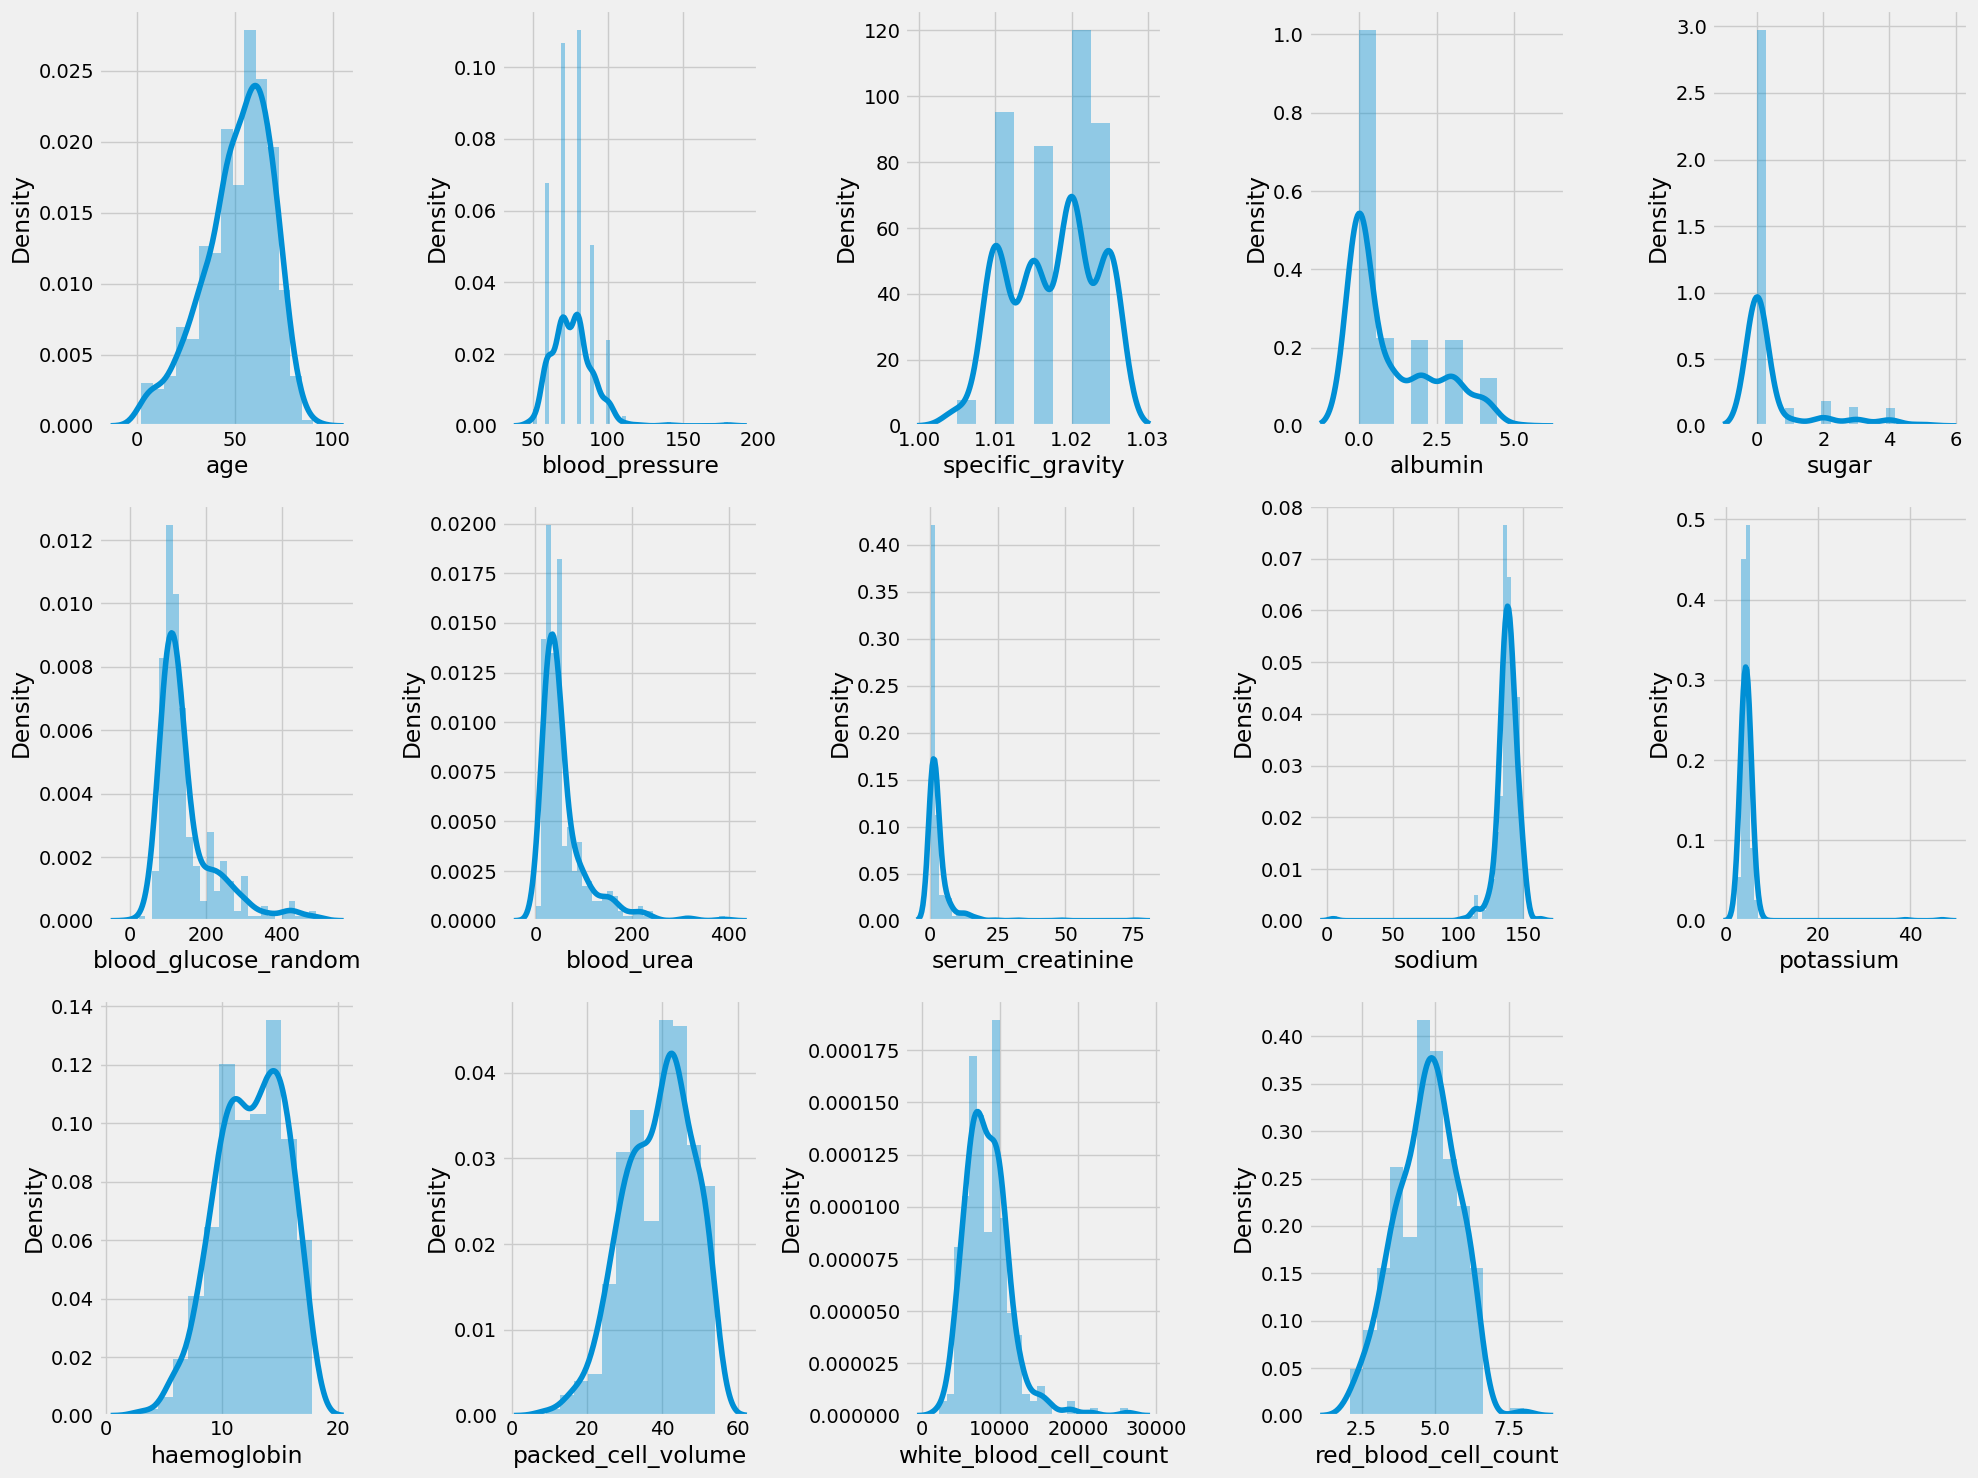

In [21]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


### from above distribution plots we can see that some of the features are normally distributed while some are skewed.
#### Due to Skewness is present in some of the columns.

#### looking at categorical columns

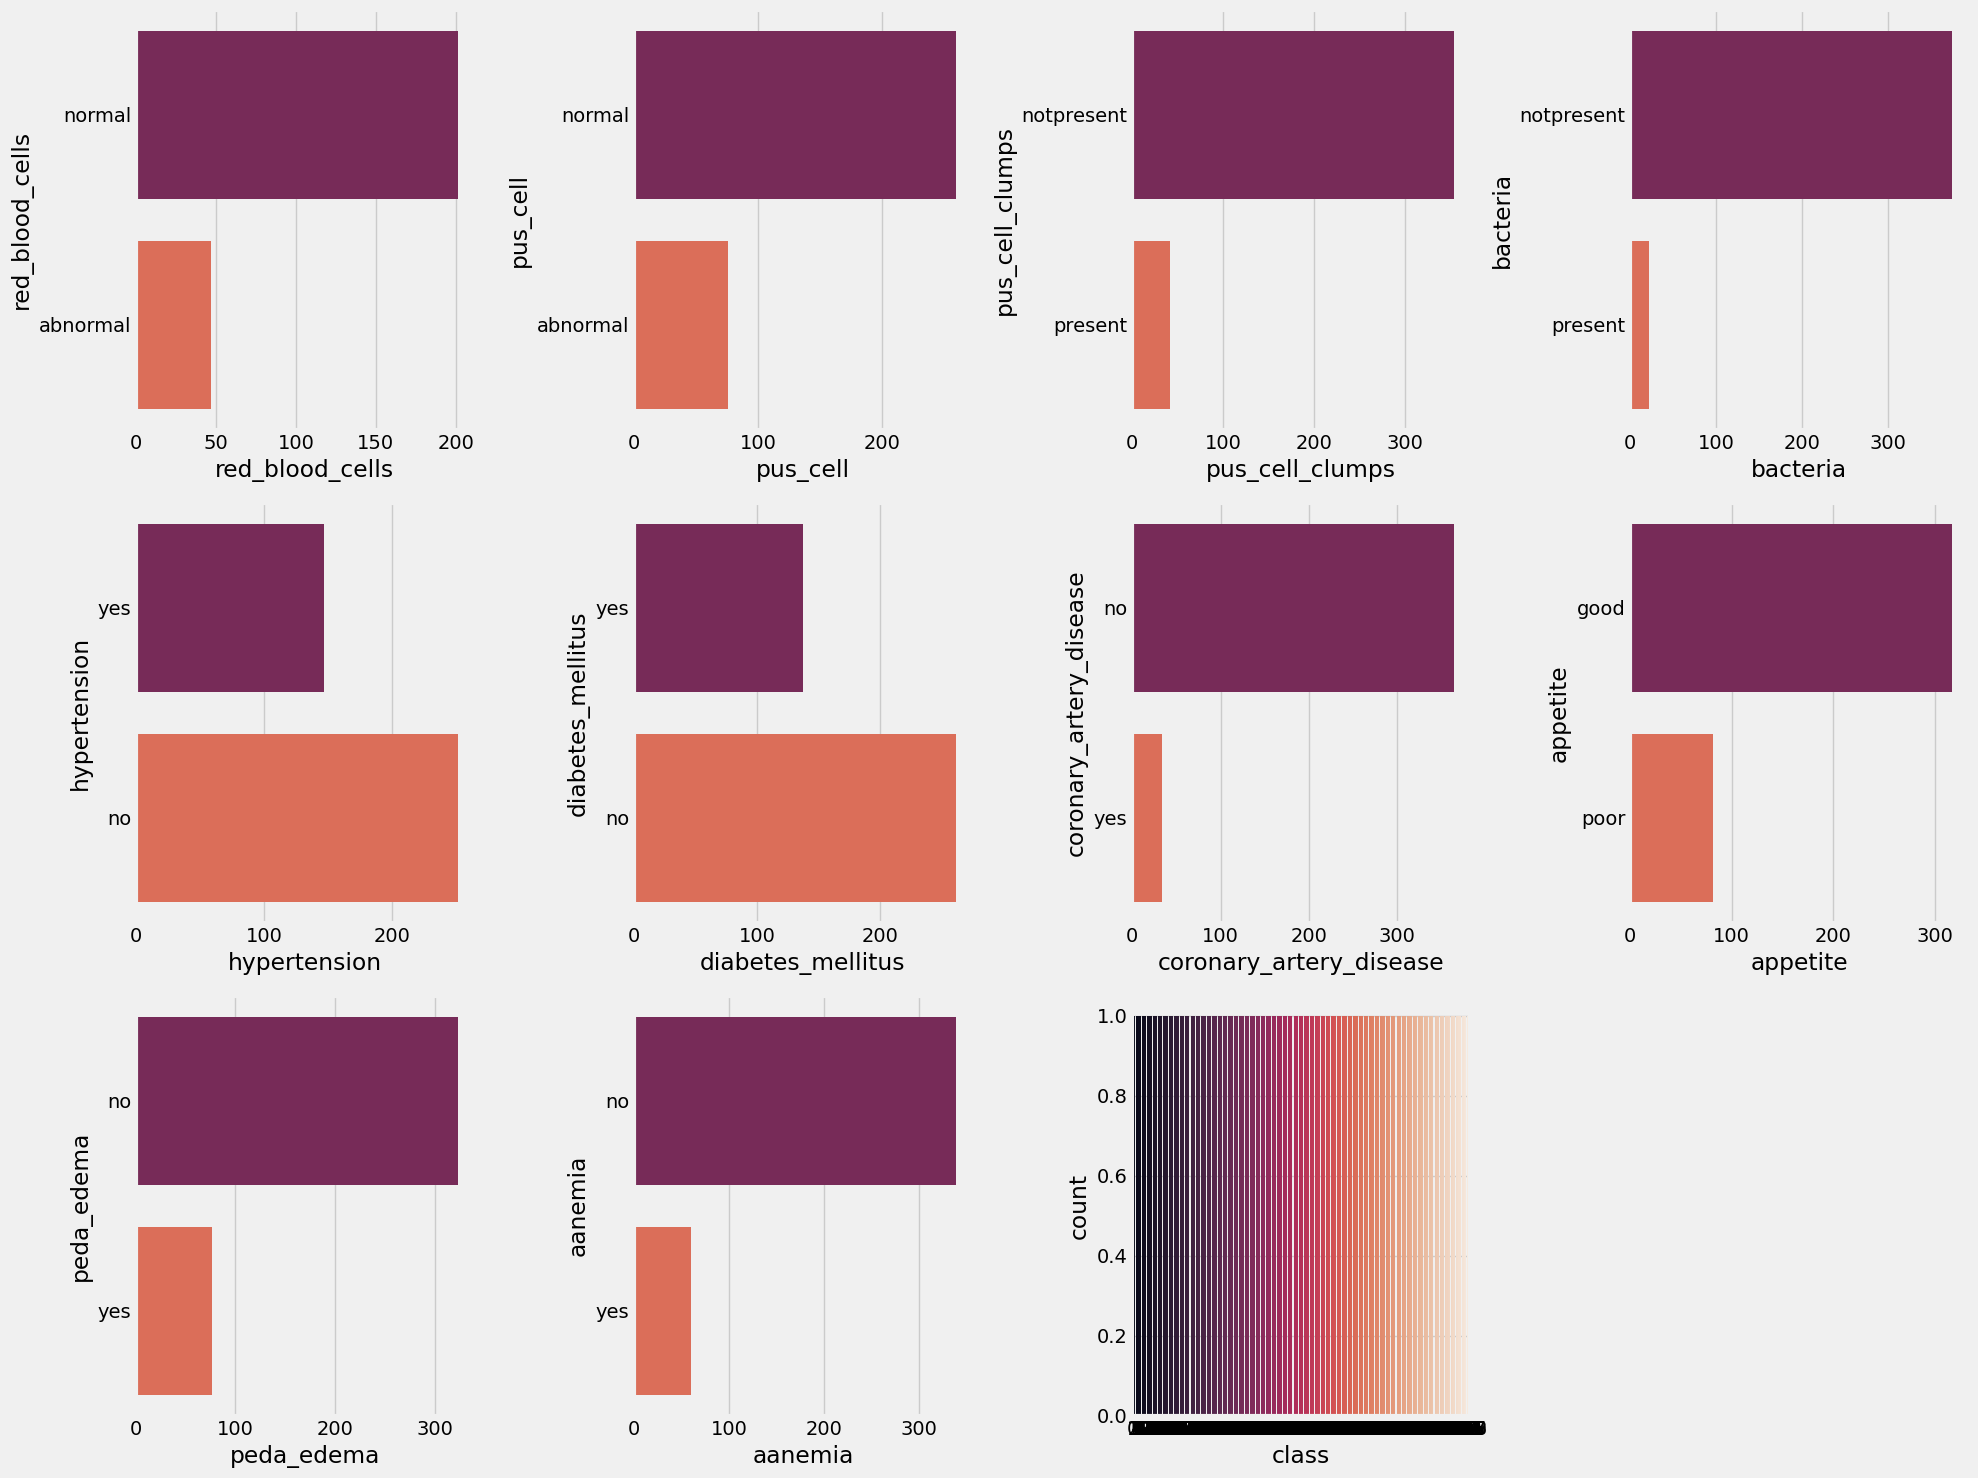

In [22]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


### class 0 means chronic kidney disease and 
### class 1 means not chronic kidney disease.

In [23]:
# from above graph calss we can see that the class is imbalanced.
# We can see that the class is imbalanced.
# We can use the value_counts() method to visualize the class distribution
print(df['class'].value_counts())


class
0    250
1    150
Name: count, dtype: int64


#### heatmap of data (numeric columns only)

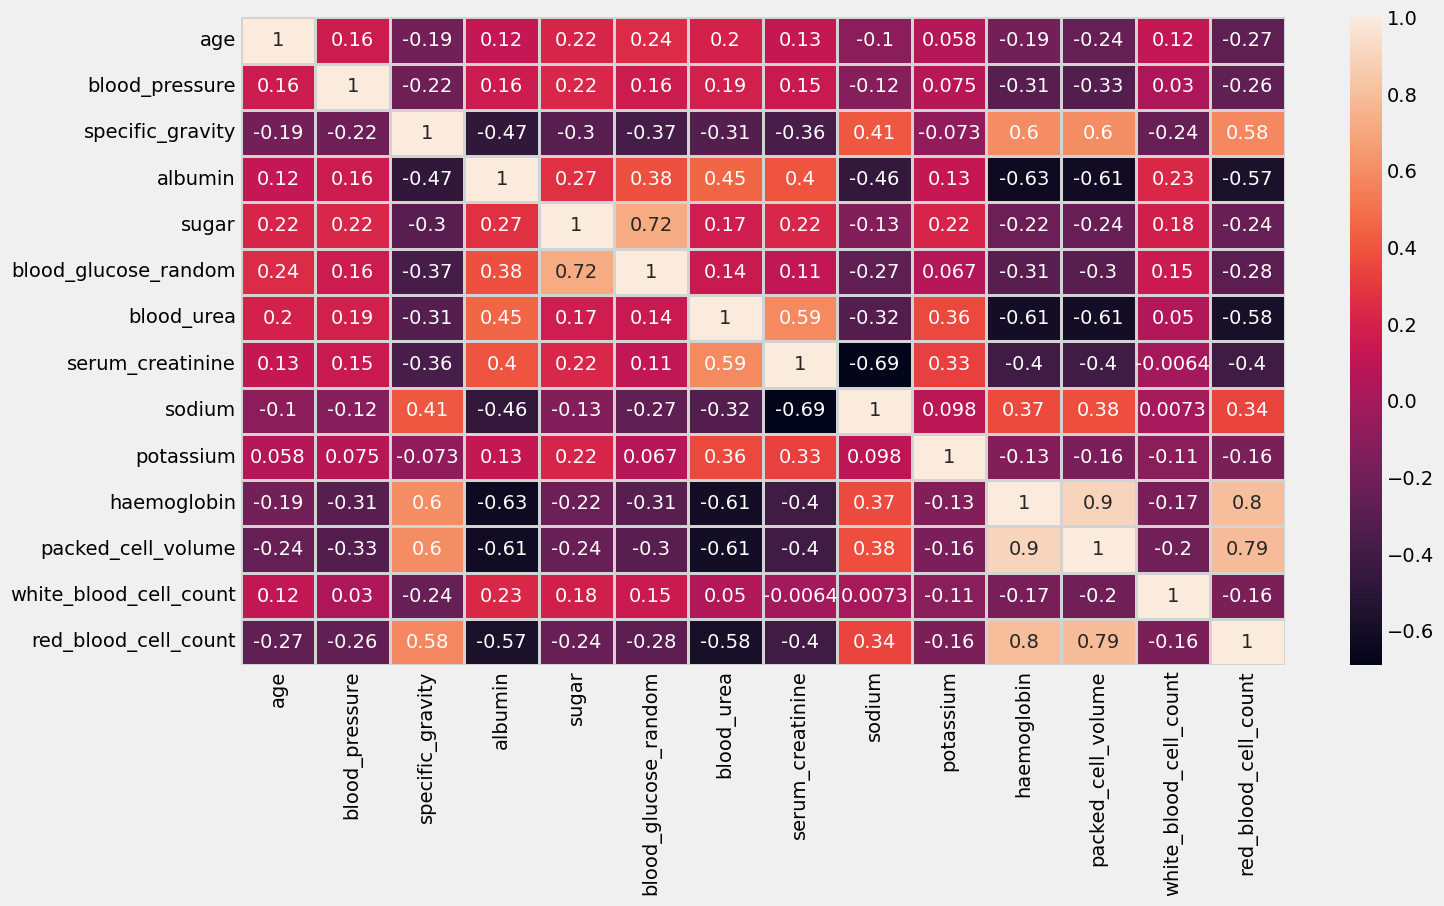

In [24]:
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


# Exploratory Data Analysis (EDA)

In [25]:
import plotly.express as px
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()


### red blood cell plot

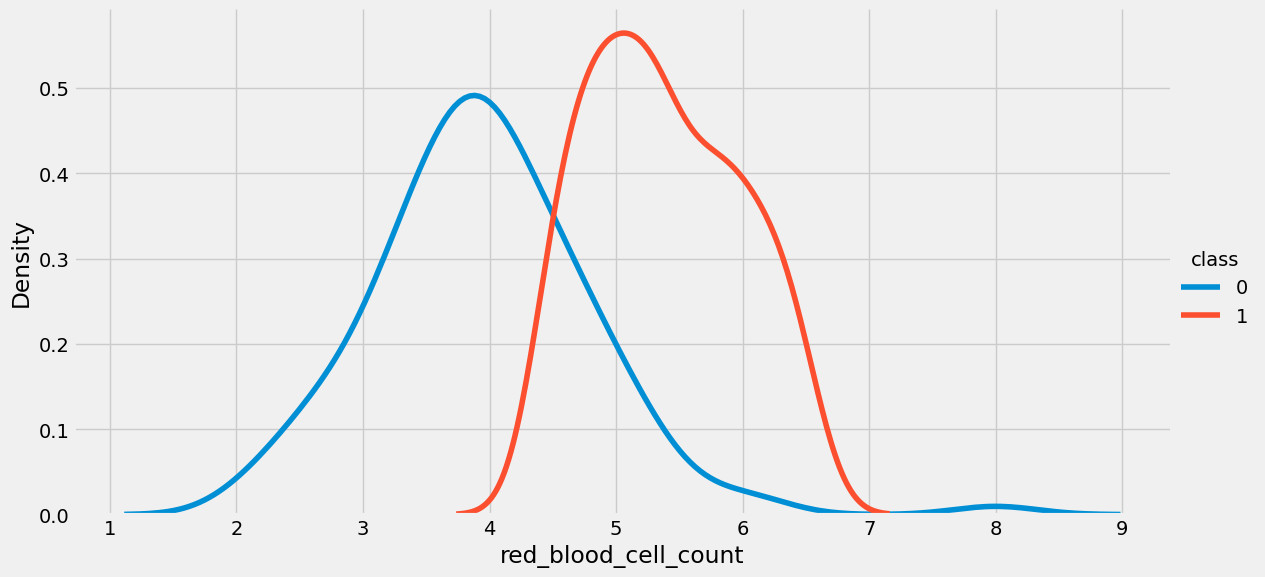

In [26]:

# kde of red blood cell count
kde('red_blood_cell_count')
# scatter plot of red blood cell count vs haemoglobin
scatter('red_blood_cell_count', 'haemoglobin')	
# violin plot of red blood cell count
violin('red_blood_cell_count')


### white blood cell plot

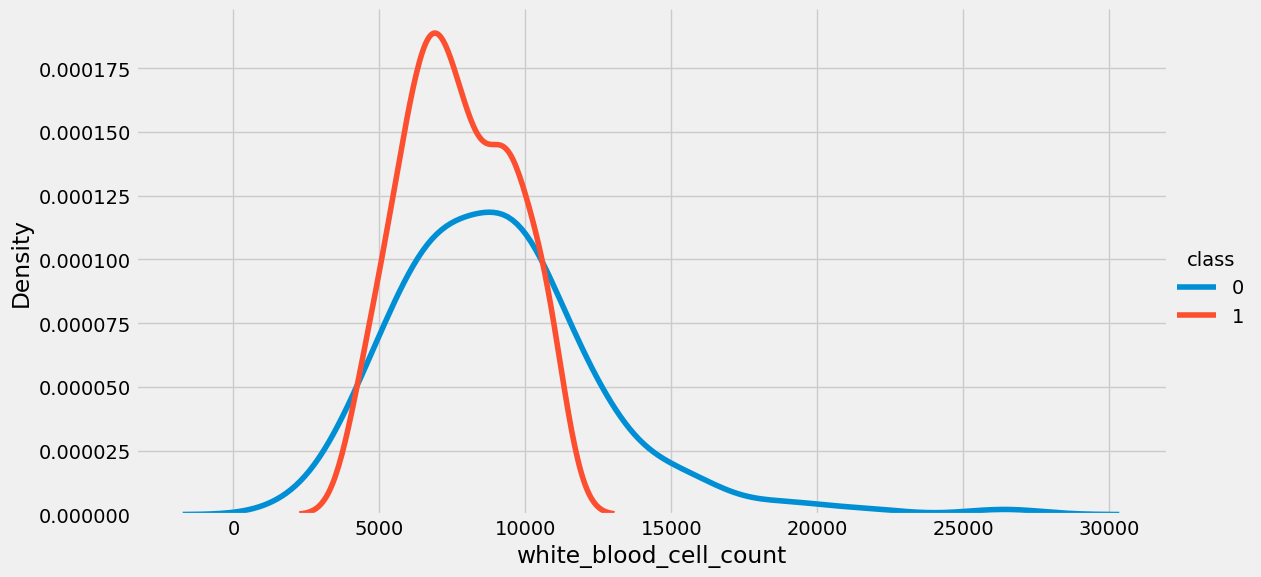

In [27]:

kde('white_blood_cell_count')
violin('white_blood_cell_count')


### packed cell volume plot

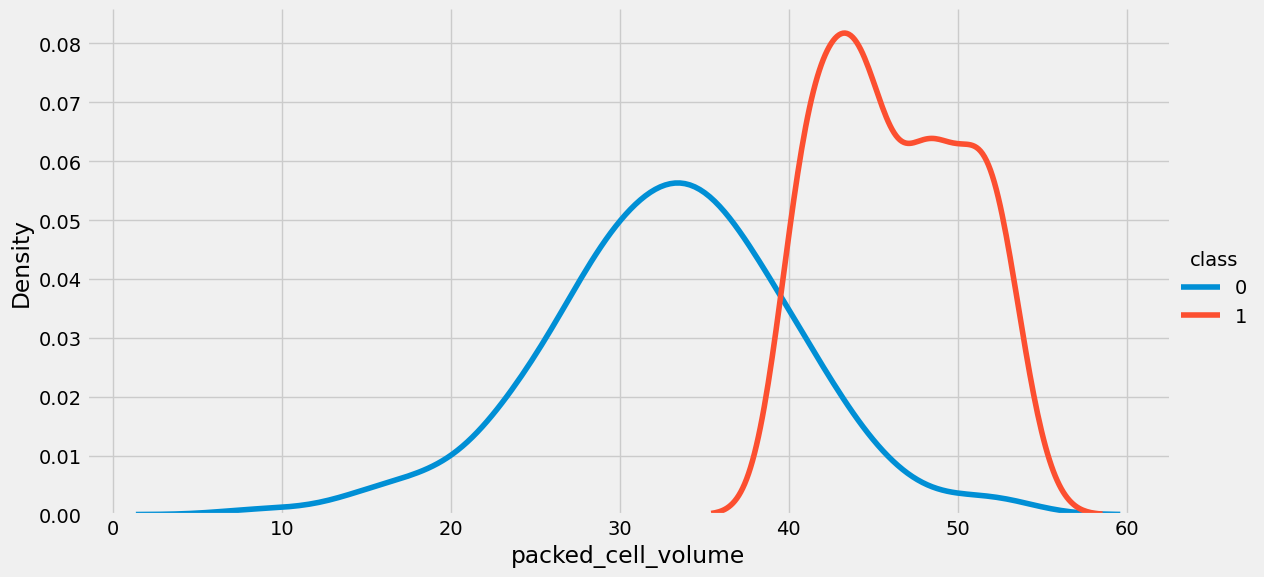

In [28]:

kde('packed_cell_volume')
violin('packed_cell_volume')


In [29]:
scatter('haemoglobin', 'packed_cell_volume')


In [30]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)


In [31]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)


# Data Pre Processing

#### checking for null values

In [32]:
df.isna().sum().sort_values(ascending = True)


class                        0
aanemia                      1
peda_edema                   1
appetite                     1
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
pus_cell_clumps              4
bacteria                     4
age                          9
blood_pressure              12
serum_creatinine            17
blood_urea                  19
blood_glucose_random        44
albumin                     46
specific_gravity            47
sugar                       49
haemoglobin                 52
pus_cell                    65
packed_cell_volume          71
sodium                      87
potassium                   88
white_blood_cell_count     106
red_blood_cell_count       131
red_blood_cells            152
dtype: int64

### We can see that there are some missing values in the dataset.

In [33]:
df[num_cols].isnull().sum()


age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

#### We can see that there are missing values in the categorical columns.

In [34]:
df[cat_cols].isnull().sum()


red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

### Filling null values, we will use two methods, random sampling for higher null values and 
### mean/mode sampling for lower null values

In [35]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)


### Filling num_cols null values using random sampling method

In [36]:
for col in num_cols:
    random_value_imputation(col)


# We can see that there are no missing values in the dataset.

In [37]:
df[num_cols].isnull().sum()


age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

#### Filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

In [38]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)


# We can see that there are no missing values in the dataset.

In [39]:
df[cat_cols].isnull().sum()


red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

# All the missing values are handeled now, lets do categorical features encoding now


#### Feature Encoding

In [40]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")


red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



## As all of the categorical columns have 2 categories we can use label encoder

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
# checking the unique values in the categorical columns after encoding

# We can see that the categorical columns are encoded now.
# checking the unique values in the categorical columns after encoding
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")


red_blood_cells has [0 1] values

pus_cell has [1 0] values

pus_cell_clumps has [0 1] values

bacteria has [0 1] values

hypertension has [1 0] values

diabetes_mellitus has [1 0] values

coronary_artery_disease has [0 1] values

appetite has [0 1] values

peda_edema has [0 1] values

aanemia has [0 1] values

class has [0 1] values



In [42]:
df.head()
df.to_csv('chronic_kidney_disease_cleaned.csv', index=False)


# Model Building

### - Domain Machine Learning (ML) 
### - Learning models falles under the category of supervised learning, where the model learns from 
### - labeled data to make predictions or classifications. 

##### In this case, we will build a classification model to predict chronic kidney disease (CKD) based on the features in the dataset.

In [43]:
# Splitting the dataset into independent and dependent variables
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]


In [44]:
# splitting data independent training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


# First I would like to try using KNN classifier as the dataset is classification problem and KNN works well with categorical features
##### KNN is a supervised learning algorithm because it uses labeled data to train its model. 
###### The model learns to map input features to corresponding output labels. 
###### KNN primarily serves as a classification algorithm, 
###### where the goal is to predict the class of a new data point based on the classes of its nearest neighbors. 
###### KNN uses a distance metric (like Euclidean distance) to identify the nearest neighbors in the training data.


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")


Training Accuracy of KNN is 0.7892857142857143
Test Accuracy of KNN is 0.6083333333333333 

Confusion Matrix :- 
[[47 25]
 [22 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.68      0.65      0.67        72
           1       0.51      0.54      0.53        48

    accuracy                           0.61       120
   macro avg       0.60      0.60      0.60       120
weighted avg       0.61      0.61      0.61       120



# what I see is that the accuracy of the model is not that great,
### so I will try using Decision Tree Classifier which is also a supervised learning algorithm and works well with categorical features


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of decision tree classifier
dt_acc = accuracy_score(y_test, dt.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dt.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dt_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dt.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dt.predict(X_test))}")
# The accuracy of the Decision Tree Classifier is better than KNN,
# so I will use Decision Tree Classifier for further analysis.
# Feature Importance using Decision Tree Classifier


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[71  1]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.98      0.92      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



# Hyper parameter tuning of decision tree 

In [47]:


from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)



Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

### Best parameters and best score

In [48]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)


{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'best'}
0.9857142857142858


## Best estimator

In [49]:
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of Decision Tree Classifier is 0.9785714285714285
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[71  1]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.98      0.92      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



# Random Forest Classifier

#### Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions.

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of random forest classifier
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rf_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(X_test))}")
# The accuracy of the Random Forest Classifier is better than Decision Tree Classifier,



Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### So I will use Random Forest Classifier for further analysis.
# Hyperparameter tuning of Random Forest Classifier

In [51]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [2, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search_rf = GridSearchCV(rf, grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
# best parameters and best score
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
# best estimator
rf_best = grid_search_rf.best_estimator_
# accuracy score, confusion matrix and classification report of random forest classifier
rf_best_acc = accuracy_score(y_test, rf_best.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf_best.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rf_best_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf_best.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rf_best.predict(X_test))}")
# The accuracy of the Random Forest Classifier is better than Decision Tree Classifier,


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
0.9964285714285713
Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## AdaBoost Classifier

### AdaBoost is an ensemble learning method that combines multiple weak classifiers to create a strong classifier.

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)   
# accuracy score, confusion matrix and classification report of AdaBoost classifier
ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Training Accuracy of AdaBoost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of AdaBoost Classifier is {ada_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")
# The accuracy of the AdaBoost Classifier is better than Decision Tree Classifier,



Training Accuracy of AdaBoost Classifier is 1.0
Test Accuracy of AdaBoost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## Gradient Boosting Classifier

### Gradient Boosting is an ensemble learning method that combines multiple weak classifiers to create a strong classifier.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of Gradient Boosting classifier
gb_acc = accuracy_score(y_test, gb.predict(X_test))
print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")
# The accuracy of the Gradient Boosting Classifier is better than Decision Tree Classifier,


Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[72  0]
 [ 5 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



## Stochastic Gradient Boosting (SGB)

### Stochastic Gradient Boosting is a variant of Gradient Boosting that uses a random subset of the data to train each weak classifier.

In [54]:
# There is no StochasticGradientBoostingClassifier in sklearn.
# Instead, use GradientBoostingClassifier with subsample < 1.0 for stochasticity.

sgb = GradientBoostingClassifier(subsample=0.8, random_state=42)    
sgb.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of Stochastic Gradient Boosting classifier
sgb_acc = accuracy_score(y_test, sgb.predict(X_test))
print(f"Training Accuracy of Stochastic Gradient Boosting Classifier is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting Classifier is {sgb_acc} \n")  
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")
# The accuracy of the Stochastic Gradient Boosting Classifier is better than Decision Tree Classifier,


Training Accuracy of Stochastic Gradient Boosting Classifier is 1.0
Test Accuracy of Stochastic Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## XGBoost Classifier
#### XGBoost is an optimized implementation of Gradient Boosting that is designed to be faster and more efficient.

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of XGBoost classifier
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XGBoost Classifier is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XGBoost Classifier is {xgb_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")
# The accuracy of the XGBoost Classifier is better than Decision Tree Classifier,


Training Accuracy of XGBoost Classifier is 1.0
Test Accuracy of XGBoost Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## Cat Boost Classifier

### CatBoost is a gradient boosting library that is designed to handle categorical features

In [56]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of CatBoost classifier
cat_acc = accuracy_score(y_test, cat.predict(X_test))
print(f"Training Accuracy of CatBoost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of CatBoost Classifier is {cat_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")
# The accuracy of the CatBoost Classifier is better than Decision Tree Classifier,


Training Accuracy of CatBoost Classifier is 1.0
Test Accuracy of CatBoost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



# Extra Trees Classifier

### Extra Trees is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions.

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of Extra Trees classifier
et_acc = accuracy_score(y_test, et.predict(X_test))
print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, et.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {et_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, et.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, et.predict(X_test))}")
# The accuracy of the Extra Trees Classifier is better than Decision Tree Classifier,


Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



# LGBM Classifier

### LightGBM is a gradient boosting framework that uses tree-based learning algorithms and is designed to be efficient and scalable.

In [58]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of LGBM classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))
print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, lgbm.predict(X_test))}")
# The accuracy of the LGBM Classifier is better than Decision Tree Classifier,
# Summary of all models
models = {
    'KNN': knn_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'AdaBoost': ada_acc,
    'Gradient Boosting': gb_acc,
    'Stochastic Gradient Boosting': sgb_acc,
    'XGBoost': xgb_acc,
    'CatBoost': cat_acc,
    'Extra Trees': et_acc,
    'LGBM': lgbm_acc
}
# Creating a DataFrame to summarize the model accuracies
model_summary = pd.DataFrame(models.items(), columns=['Model', 'Accuracy'])
# Sorting the DataFrame by accuracy in descending order
model_summary = model_summary.sort_values(by='Accuracy', ascending=False)   
# Displaying the model summary
print(model_summary)
# The model summary shows the accuracy of each model on the test set.
# The Random Forest Classifier has the highest accuracy, followed by XGBoost and LGBM Classifier.
# The Random Forest Classifier is the best model for this dataset.
# Saving the best model


[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### To create a bar chart to compare the accuracies of different models.

In [59]:
px.bar(data_frame = model_summary, x = 'Accuracy', y = 'Model', color = 'Accuracy', template = 'plotly_dark', 
       title = 'Models Comparison')


# Development of the model

In [60]:
# from above i see that the Random Forest Classifier is the best model for this dataset.
# I will save the Random Forest Classifier model using pickle

import pickle
# Save the best model
with open('chronic_kidney_disease_model.sav', 'wb') as f:
    pickle.dump(rf_best, f)
# Load the model
with open('chronic_kidney_disease_model.sav', 'rb') as f:
    loaded_model = pickle.load(f)
# Predicting using the loaded model
sample_data = X_test.sample(1)
sample_prediction = loaded_model.predict(sample_data)
print("Sample Data:")
print(sample_data.to_string())
print()
print(f"Predicted Class: {sample_prediction[0]}")
# The model is saved and can be used for prediction on new data.


Sample Data:
      age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  white_blood_cell_count  red_blood_cell_count  hypertension  diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  aanemia
340  32.0            70.0             1.025      0.0    0.0                1         1                0         0                 100.0        29.0               1.1   142.0        4.5         14.3                43.0                  6700.0                   5.9             0                  0                        0         0           0        0

Predicted Class: 1


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load cleaned data
df = pd.read_csv("chronic_kidney_disease_cleaned.csv")

# Encode categorical variables if any (ensure all are numeric)
X = df.drop("class", axis=1)
y = df["class"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model as .sav
model_path = "ckd_rf_model.sav"
joblib.dump(model, model_path)

# Save scaler too for deployment use
scaler_path = "ckd_scaler.sav"
joblib.dump(scaler, scaler_path)

model_path, scaler_path


('ckd_rf_model.sav', 'ckd_scaler.sav')